# 1.1 Simple random walk (SRW)

In [10]:
#box for importing packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def cSRW(L, p, steps): #closed boundary conditions 
    X = np.random.rand(steps)
    X[X<p] = 1
    X[X!=1] = -1
    Y = np.zeros(steps)
    Y[0] = 1
    for i in range(0, (steps-1)):
#         rand = np.random.rand() #not sure if closed interval
        if Y[i] == 1:
            if X[i] == -1:
                Y[i+1] = 1
            else:
                Y[i+1] = 2
        elif Y[i] == L:
            if  X[i] == -1:
                Y[i+1] = L-1
            else:
                Y[i+1] = L
        elif X[i] == 1:
            Y[i+1] = Y[i] + 1
        elif X[i] == -1:
            Y[i+1] = Y[i] - 1
    return Y
    if 0 or 11 in Y:
        print("you failed") #sanity check for closed boundaries

(array([  2.,   7.,  11.,  18.,  27.,  36.,  58.,  74., 107., 159.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

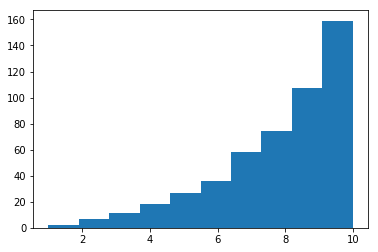

In [14]:
L = 10
p = 0.6
steps = 100
finalstate = np.zeros(499)

for i in range(0, 499):
    finalstate[i] = cSRW(L, p, steps)[steps-1]
    
plt.hist(finalstate, bins = len(np.unique(finalstate)), range = (1, 10))

(array([  2.,   3.,   5.,   8.,  11.,  13.,  23.,  55., 380.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 9 Patch objects>)

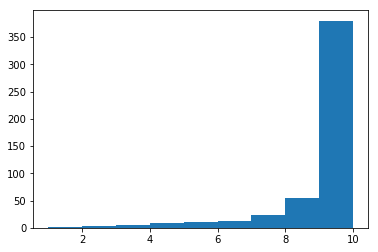

In [4]:
Y = cSRW(10, 0.7, 500)
# print(Y)
plt.hist(Y, bins = 9, range = (1,10))

In [8]:
np.unique(finalstate)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [9]:
len(np.unique(finalstate))

10

/home/yuanyi/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


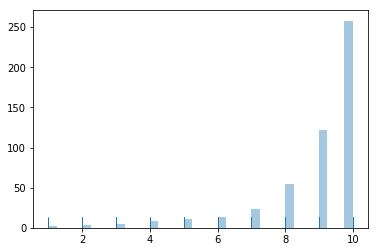

In [15]:
sns.distplot(Y, kde = False, rug = True)

# THEORETICAL STATIONARY DISTRIBUTION

In [22]:
stdist = np.zeros(L)
const = p/(1-p)
stdist[0] = (1-const)/(1-(const)**L)
for i in range(1, L-1):
    stdist[i] = const * stdist[i-1]

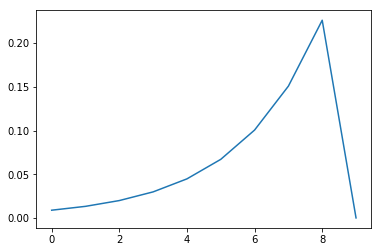

In [23]:
plt.(stdist)

In [24]:
print(stdist)

[0.00882378 0.01323567 0.01985351 0.02978027 0.0446704  0.0670056
 0.1005084  0.1507626  0.2261439  0.        ]
